# Wandb

In [1]:
!pip install wandb -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00


In [2]:
import wandb

In [3]:
#### CHANGE ACCORDINGLY###
wandb.login(key="fd03f0adf38ef723e0db64fb17c11ea8efa4b4a6") # Use your own wandb api key
#### CHANGE ACCORDINGLY###


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Mount to Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [5]:
%cd  /content/drive/MyDrive/online arduino kit - cv group/cv-component

/content/drive/.shortcut-targets-by-id/12qdxIhrJkYThSDH6ulLJ4IaUDG4pGrFG/RA_Daragh_CV_Arduino/cv-component


# Data Processing Viz

## Canny visualization

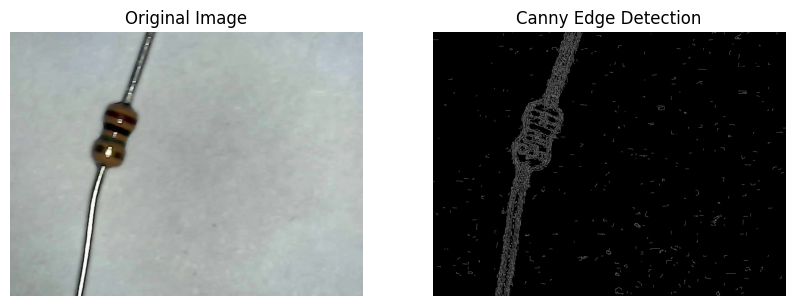

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/online arduino kit - cv group/data/new_set_up_frames/test/01/7.jpg"
# image_path = "/content/drive/MyDrive/online arduino kit - cv group/data/newData/train/5_NPN_Bipolar_Transistors/10.jpg"

img = cv2.imread(image_path)

# Convert to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
# edges = cv2.Canny(gray_img, 10, 20)
edges = cv2.Canny(gray_img, 10, 20)


# Display original and edge-detected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()


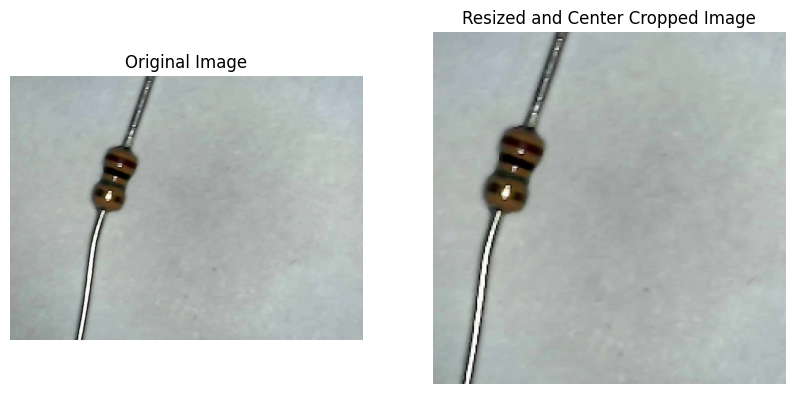

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/online arduino kit - cv group/data/new_set_up_frames/test/01/7.jpg"
img = cv2.imread(image_path)

resize_target = 224

# Resize the image to the desired aspect ratio
target_size = (int(resize_target * img.shape[1] / img.shape[0]), resize_target)  # Example target size with preserved aspect ratio
resized_img = cv2.resize(img, target_size)

# Calculate the center crop coordinates
crop_x = (resized_img.shape[1] - resize_target) // 2
crop_y = (resized_img.shape[0] - resize_target) // 2

# Perform center crop
center_cropped_img = resized_img[crop_y:crop_y+resize_target, crop_x:crop_x+resize_target]

# Convert to RGB (OpenCV uses BGR by default)
center_cropped_rgb = cv2.cvtColor(center_cropped_img, cv2.COLOR_BGR2RGB)

# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(center_cropped_rgb)
plt.title('Resized and Center Cropped Image')
plt.axis('off')

plt.show()


## Color jitter viz

In [ ]:
cd q1_q2_classification/

/content/drive/.shortcut-targets-by-id/12qdxIhrJkYThSDH6ulLJ4IaUDG4pGrFG/RA_Daragh_CV_Arduino/cv-component/q1_q2_classification


In [ ]:
import os
import random
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import matplotlib.pyplot as plt
from torchvision.transforms import v2
from torchvision.transforms import functional

class CustomTransform(torch.nn.Module):
    def forward(self, img):  # we assume inputs are always structured like this
        print(
            f"I'm transforming an image of shape {img.size} "
        )
        color = img.getpixel((0, 0))
        w, h = img.size
        trans = transforms.Pad(padding=(1080 - w, 720 - h), padding_mode="constant", fill=color)
        img = trans(img)
        # Do some transformations. Here, we're just passing though the input
        return img


class VOCDataset(Dataset):
    # classes = ['0_black_3_legs', '5_NPN_Bipolar_Transistors', '6_Black_Rec']
    classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    def __init__(self, split, size, data_dir):
        self.data_dir = data_dir
        self.size = size
        self.split = split
        self.classes = VOCDataset.classes
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = self._load_images()
        # print(self.class_to_idx)

    def _load_images(self):
        images = []
        data_split_path = "train" if self.split == "train" else "test"
        for cls in self.classes:
            class_path = os.path.join(self.data_dir, data_split_path, cls)
            if not os.path.exists(class_path):
                raise FileNotFoundError(f"Directory not found: {class_path}")

            class_images = [os.path.join(class_path, img_name) for img_name in os.listdir(class_path)]

            for img_path in class_images:
                # Check if img_path ends with a valid image extension
                if img_path.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                    images.append((img_path, self.class_to_idx[cls]))
                else:
                    print(f"Invalid image file: {img_path}")
        return images


    def __len__(self):
        return len(self.images)

    def get_random_augmentations_6(self):
        if self.split == "train":
            augmentations = [
                transforms.CenterCrop((1080, 1080)),
                transforms.RandomHorizontalFlip(p=0.5),
                transforms.RandomVerticalFlip(p=0.5),
                transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                transforms.RandomAffine(degrees=(-0, 0), translate=(0.1, 0.1), fill = 255),
            ]
        elif self.split == "val" or self.split == "test":
            augmentations = [
                transforms.CenterCrop((1080, 1080)),
                transforms.RandomHorizontalFlip(p=0),
            ]
        else:
            raise ValueError("Invalid value for 'split'. Expected 'train', 'val' or 'test'.")
        return augmentations



    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path).convert('RGB')

        trans = transforms.Compose([
            *self.get_random_augmentations_6(),
            transforms.Resize(self.size),
            transforms.ToTensor(),
            # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

        image = trans(image)
        weight = torch.ones(len(self.classes))
        class_vec = torch.zeros(len(self.classes))
        class_vec[label] = 1
        return image, class_vec, weight


In [ ]:
ls ../../data/0508_camera_frames/

ls: cannot access '../../data/0508_camera_frames/': No such file or directory


In [ ]:
# Apply the transformation to your dataset
dataset = VOCDataset('train', 224, data_dir="../../data/0501_camera_frames/")

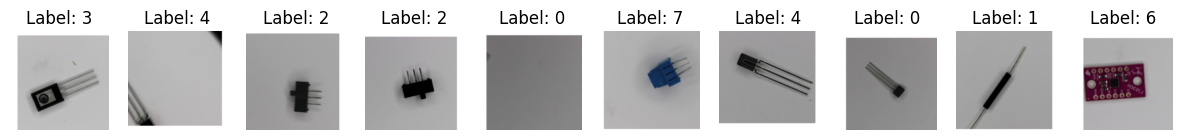

In [ ]:
import torch
import matplotlib.pyplot as plt

def visualize_images(dataset, num_images=5):
    """
    Visualize a random sample of images from the dataset.

    Args:
        dataset (Dataset): The dataset object.
        num_images (int): Number of images to visualize. Default is 5.
    """
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        # Get a random index
        idx = torch.randint(len(dataset), size=(1,)).item()

        # Get the image, label, and weight using __getitem__
        image, label, weight = dataset.__getitem__(idx)

        # Plot the image
        axes[i].imshow(image.permute(1, 2, 0))
        axes[i].set_title(f"Label: {label.argmax().item()}")
        axes[i].axis('off')
    plt.show()

# Example usage:
visualize_images(dataset, 10)


In [ ]:
import torch
print(torch.__version__)

2.2.1+cu121


# Train

## Augmentation: no rotation

In [ ]:
!python q1_q2_classification/train_q2.py \
    --run_name 0501_camera_frames_no_aug \
    --canny_low 10 \
    --canny_high 20 \
    --epochs 10 \
    --save_freq 1 \
    --data_dir ../data/0501_camera_frames/ \
    --batch_size 128 \
    --lr 0.005 \
    --val_every 1

Namespace(device=device(type='cuda'), batch_size=128, test_batch_size=1000, epochs=10, lr=0.005, gamma=0.1, step_size=30, log_every=100, val_every=1, save_at_end=True, save_freq=1, use_cuda=True, inp_size=224, canny_low=10, canny_high=20, data_dir='../data/0501_camera_frames/', run_name='0501_camera_frames_no_aug')
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
wandb: Currently logged in as: sherrywu178 (16824-pointe). U

## Augmentation 2: ROTATION

In [ ]:
!python q1_q2_classification/train_q2.py \
    --run_name 0501_camera_frames_aug2_rotate \
    --canny_low 10 \
    --canny_high 20 \
    --epochs 10 \
    --save_freq 1 \
    --data_dir ../data/0501_camera_frames/ \
    --batch_size 128 \
    --lr 0.005 \
    --val_every 1

Namespace(device=device(type='cuda'), batch_size=128, test_batch_size=1000, epochs=10, lr=0.005, gamma=0.1, step_size=30, log_every=100, val_every=1, save_at_end=True, save_freq=1, use_cuda=True, inp_size=224, canny_low=10, canny_high=20, data_dir='../data/0501_camera_frames/', run_name='0501_camera_frames_aug2_rotate')
10
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
wandb: Currently logged in as: sherrywu178 (16824-po

## Augmentation 3: ROTATION + RELIGHT (0.2)

In [ ]:
!python q1_q2_classification/train_q2.py \
    --run_name 0501_camera_frames_aug3_rotate+relight \
    --canny_low 10 \
    --canny_high 20 \
    --epochs 10 \
    --save_freq 1 \
    --data_dir ../data/0501_camera_frames/ \
    --batch_size 128 \
    --lr 0.005 \
    --val_every 1

Namespace(device=device(type='cuda'), batch_size=128, test_batch_size=1000, epochs=10, lr=0.005, gamma=0.1, step_size=30, log_every=100, val_every=1, save_at_end=True, save_freq=1, use_cuda=True, inp_size=224, canny_low=10, canny_high=20, data_dir='../data/0501_camera_frames/', run_name='0501_camera_frames_aug3_rotate+relight')
10
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
wandb: Currently logged in as: sherrywu178 (

## Augmentation 4: ROTATION + RELIGHT (0.4)

In [ ]:
!python q1_q2_classification/train_q2.py \
    --run_name 0501_camera_frames_aug3_rotate+relight_04 \
    --canny_low 10 \
    --canny_high 20 \
    --epochs 10 \
    --save_freq 1 \
    --data_dir ../data/0501_camera_frames/ \
    --batch_size 128 \
    --lr 0.005 \
    --val_every 1

Namespace(device=device(type='cuda'), batch_size=128, test_batch_size=1000, epochs=10, lr=0.005, gamma=0.1, step_size=30, log_every=100, val_every=1, save_at_end=True, save_freq=1, use_cuda=True, inp_size=224, canny_low=10, canny_high=20, data_dir='../data/0501_camera_frames/', run_name='0501_camera_frames_aug3_rotate+relight_04')
10
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
wandb: Currently logged in as: sherrywu17

## Augmentation 5: Affine + RELIGHT (0.4) + translate (0.3, 0.3)

In [ ]:
!python q1_q2_classification/train_q2.py \
    --run_name 0501_camera_frames_aug5_afffine+relight_04 \
    --canny_low 10 \
    --canny_high 20 \
    --epochs 10 \
    --save_freq 1 \
    --data_dir ../data/0501_camera_frames/ \
    --batch_size 128 \
    --lr 0.005 \
    --val_every 1

python3: can't open file '/content/drive/.shortcut-targets-by-id/12qdxIhrJkYThSDH6ulLJ4IaUDG4pGrFG/RA_Daragh_CV_Arduino/cv-component/q1_q2_classification/q1_q2_classification/train_q2.py': [Errno 2] No such file or directory


## Augmentation 6: resize = 512 + Affine + RELIGHT (0.4) + translate (0.3, 0.3)

In [ ]:
!python q1_q2_classification/train_q2.py \
    --run_name 0508_camera_frames_aug5_afffine+relight_04 \
    --canny_low 10 \
    --canny_high 20 \
    --epochs 10 \
    --save_freq 1 \
    --data_dir ../data/0501_camera_frames/ \
    --batch_size 16 \
    --lr 0.005 \
    --val_every 1 \
    --inp_size 512

Namespace(device=device(type='cuda'), batch_size=16, test_batch_size=1000, epochs=10, lr=0.005, gamma=0.1, step_size=30, log_every=100, val_every=1, save_at_end=True, save_freq=1, use_cuda=True, inp_size=512, canny_low=10, canny_high=20, data_dir='../data/0501_camera_frames/', run_name='0501_camera_frames_aug5_afffine+relight_04')
10
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.or

## Augmentation 7: resize = 512 + RELIGHT (0.1)

In [ ]:
!python q1_q2_classification/train_q2.py \
    --run_name 0508_camera_frames_aug5_afffine+relight_04 \
    --canny_low 10 \
    --canny_high 20 \
    --epochs 10 \
    --save_freq 1 \
    --data_dir ../data/0501_camera_frames/ \
    --batch_size 128 \
    --lr 0.005 \
    --val_every 1

Namespace(device=device(type='cuda'), batch_size=128, test_batch_size=1000, epochs=10, lr=0.005, gamma=0.1, step_size=30, log_every=100, val_every=1, save_at_end=True, save_freq=1, use_cuda=True, inp_size=224, canny_low=10, canny_high=20, data_dir='../data/0501_camera_frames/', run_name='0508_camera_frames_aug5_afffine+relight_04')
10
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.o

In [ ]:
ls

 assignment.pdf              ngrok-stable-linux-amd64.zip   requirements.txt
 assignment.zip              q1_q2_classification/          runs/
 camera_frames_aug+jitter/   q1_q2_classification.zip      't-SNE plot.png'
 checkpoints/                README.md                      untitled
 ngrok                       requirements_colab.txt         wandb/


In [ ]:
cat q1_q2_classification/voc_dataset.py

In [ ]:
ls

 assignment.pdf              ngrok-stable-linux-amd64.zip   requirements.txt
 assignment.zip              q1_q2_classification/          runs/
 camera_frames_aug+jitter/   q1_q2_classification.zip      't-SNE plot.png'
 checkpoints/                README.md                      wandb/
 ngrok                       requirements_colab.txt


## Augmentation 8: resize = 224 + RELIGHT (0.1) + v2 (each side of a component is differenciated)

In [ ]:
!python q1_q2_classification/train_q2.py \
    --run_name 0508_camera_frames_v4_aug1_relight_1 \
    --canny_low 10 \
    --canny_high 20 \
    --epochs 10 \
    --save_freq 1 \
    --data_dir ../data/0508_camera_frames_v4/ \
    --batch_size 128 \
    --lr 0.005 \
    --val_every 1

Namespace(device=device(type='cuda'), batch_size=128, test_batch_size=1000, epochs=10, lr=0.005, gamma=0.1, step_size=30, log_every=100, val_every=1, save_at_end=True, save_freq=1, use_cuda=True, inp_size=224, canny_low=10, canny_high=20, data_dir='../data/0508_camera_frames_v4/', run_name='0508_camera_frames_v4_aug1_relight_1')
12
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
num_classes 12
trainer num_classes 12
wandb

## Augmentation 9: resize = 224 + RELIGHT (0.1) + v2 (each side of a component is differenciated) + learning rate= 0.001

In [ ]:
!python q1_q2_classification/train_q2.py \
    --run_name 0508_camera_frames_v4_aug1_relight_1+lr0.001 \
    --canny_low 10 \
    --canny_high 20 \
    --epochs 10 \
    --save_freq 1 \
    --data_dir ../data/0508_camera_frames_v4/ \
    --batch_size 128 \
    --lr 0.001 \
    --val_every 1

Namespace(device=device(type='cuda'), batch_size=128, test_batch_size=1000, epochs=10, lr=0.001, gamma=0.1, step_size=30, log_every=100, val_every=1, save_at_end=True, save_freq=1, use_cuda=True, inp_size=224, canny_low=10, canny_high=20, data_dir='../data/0508_camera_frames_v4/', run_name='0508_camera_frames_v4_aug1_relight_1+lr0.001')
12
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pyto

## Augmentation 10: resize = 224 + RELIGHT (0.1) + v2 (each side of a component is differenciated) + learning rate= 0.001 +stepz-size=5

In [ ]:
!python q1_q2_classification/train_q2.py \
    --run_name 0508_camera_frames_v4_aug1_relight_1+lr0.005_stepsize=5 \
    --canny_low 10 \
    --canny_high 20 \
    --epochs 10 \
    --save_freq 1 \
    --data_dir ../data/0508_camera_frames_v4/ \
    --batch_size 128 \
    --lr 0.005 \
    --val_every 1 \
    --step_size 5

Namespace(device=device(type='cuda'), batch_size=128, test_batch_size=1000, epochs=10, lr=0.005, gamma=0.1, step_size=5, log_every=100, val_every=1, save_at_end=True, save_freq=1, use_cuda=True, inp_size=224, canny_low=10, canny_high=20, data_dir='../data/0508_camera_frames_v4/', run_name='0508_camera_frames_v4_aug1_relight_1+lr0.001_stepsize=5')
12
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://dow

## Augmentation 11: resize = 224 + RELIGHT (0.1) + v2 (two sides of a component are NOT differenciated) + learning rate= 0.001 +stepz-size=5

In [ ]:
!python q1_q2_classification/train_q2.py \
    --run_name 0508_camera_frames_v3_aug1_relight_1+lr0.005_stepsize=5 \
    --canny_low 10 \
    --canny_high 20 \
    --epochs 10 \
    --save_freq 1 \
    --data_dir ../data/0508_camera_frames_v3/ \
    --batch_size 128 \
    --lr 0.005 \
    --val_every 1 \
    --step_size 5

Namespace(device=device(type='cuda'), batch_size=128, test_batch_size=1000, epochs=10, lr=0.005, gamma=0.1, step_size=5, log_every=100, val_every=1, save_at_end=True, save_freq=1, use_cuda=True, inp_size=224, canny_low=10, canny_high=20, data_dir='../data/0508_camera_frames_v3/', run_name='0508_camera_frames_v3_aug1_relight_1+lr0.005_stepsize=5')
10
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
num_classes 10
trainer nu

## Augmentation 12: resize = 224 + RELIGHT (0.1) + v2 (two sides of a component are NOT differenciated) + learning rate= 0.001 +stepz-size=5

In [ ]:
!python q1_q2_classification/train_q2.py \
    --run_name 0508_camera_frames_v1_aug1_relight_1+lr0.001 \
    --canny_low 10 \
    --canny_high 20 \
    --epochs 20 \
    --save_freq 2 \
    --data_dir ../data/0508_camera_frames/ \
    --batch_size 128 \
    --lr 0.001 \
    --val_every 1

Namespace(device=device(type='cuda'), batch_size=128, test_batch_size=1000, epochs=20, lr=0.001, gamma=0.1, step_size=30, log_every=100, val_every=1, save_at_end=True, save_freq=2, use_cuda=True, inp_size=224, canny_low=10, canny_high=20, data_dir='../data/0508_camera_frames/', run_name='0508_camera_frames_v1_aug1_relight_1+lr0.001')
10
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
num_classes 10
trainer num_classes 10


In [24]:
cd ..

/content/drive/.shortcut-targets-by-id/12qdxIhrJkYThSDH6ulLJ4IaUDG4pGrFG/RA_Daragh_CV_Arduino


In [27]:
rm -r ./classification/